In [6]:
import torch
import cv2
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data.dataset import Dataset
from IPython.core.debugger import set_trace

import os

import wave
from scipy import signal
from scipy.io import wavfile

In [75]:
class Dset(Dataset):
    def __init__(self, root_dir_I, root_dir_T, transform=None):
        # I = input
        # T = target
        
        self.root_dir_I = root_dir_I
        self.root_dir_T = root_dir_T
        self.list_I = os.listdir(root_dir_I)
        self.list_T = os.listdir(root_dir_T)
        self.transform = transform
    def ToSpectogram(self,Wav):
        sample_rate, samples = Wav
        frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
        return frequencies, times, spectrogram

    def __getitem__(self, idx):
        I_name = os.path.join(self.root_dir_I,self.list_I[idx])
        T_name = os.path.join(self.root_dir_T,self.list_T[idx])
        I = wavfile.read(I_name)
        T = wavfile.read(T_name)
        frequenciesI, timesI, spectrogramI = self.ToSpectogram(I)
        frequenciesT, timesT, spectrogramT = self.ToSpectogram(T)
        return (frequenciesI, timesI, spectrogramI),(frequenciesT, timesT, spectrogramT)
        
    def __len__(self):
        return len(os.listdir( self.root_dir_T))

In [76]:
# Directory of dataset
I_dir_Train = 'Dset/bdl/'
T_dir_Train = 'Dset/slt/'


In [81]:
MyDataset = Dset(I_dir_Train,T_dir_Train)
os.listdir(I_dir_Train)

['arctic_b0126.wav',
 'arctic_b0132.wav',
 'arctic_a0026.wav',
 'arctic_a0032.wav',
 'arctic_b0324.wav',
 'arctic_b0442.wav',
 'arctic_a0581.wav',
 'arctic_b0456.wav',
 'arctic_b0330.wav',
 'arctic_b0318.wav',
 'arctic_a0224.wav',
 'arctic_b0481.wav',
 'arctic_a0542.wav',
 'arctic_b0495.wav',
 'arctic_a0556.wav',
 'arctic_a0230.wav',
 'arctic_a0218.wav',
 'arctic_b0250.wav',
 'arctic_a0393.wav',
 'arctic_b0536.wav',
 'arctic_b0522.wav',
 'arctic_b0244.wav',
 'arctic_a0387.wav',
 'arctic_b0278.wav',
 'arctic_b0293.wav',
 'arctic_a0350.wav',
 'arctic_a0436.wav',
 'arctic_a0422.wav',
 'arctic_b0287.wav',
 'arctic_a0344.wav',
 'arctic_a0378.wav',
 'arctic_a0191.wav',
 'arctic_b0052.wav',
 'arctic_a0185.wav',
 'arctic_b0046.wav',
 'arctic_a0152.wav',
 'arctic_b0091.wav',
 'arctic_a0146.wav',
 'arctic_b0085.wav',
 'arctic_b0084.wav',
 'arctic_a0147.wav',
 'arctic_b0090.wav',
 'arctic_a0153.wav',
 'arctic_b0047.wav',
 'arctic_a0184.wav',
 'arctic_b0053.wav',
 'arctic_a0190.wav',
 'arctic_a037

In [58]:
Inst = MyDataset[0]
Input = Inst[0]
Target = Inst[1]


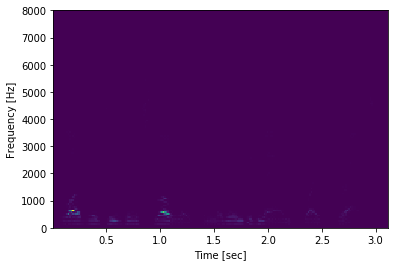

In [72]:
plt.pcolormesh(Input[1], Input[0], Input[2])
# plt.imshow(Input[2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

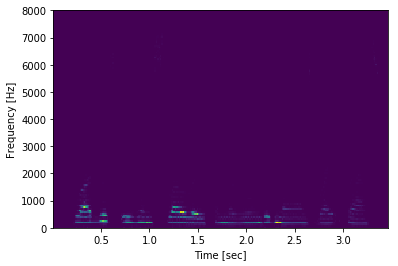

In [73]:
plt.pcolormesh(Target[1], Target[0], Target[2])
# plt.imshow(Input[2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()